In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from scipy.optimize import linprog
%matplotlib inline

# Usefule code from lecture 1

In [2]:
# Linear regression
def rec_lin_reg(Q, r):
    rec = np.linalg.lstsq(Q, r, rcond=None)[0]
    rec = np.clip(rec, 0, 1)
    rec = np.rint(rec)
    return rec

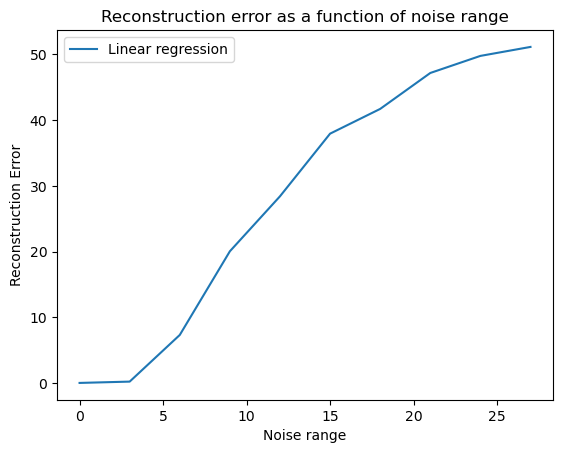

In [3]:
# Number of individuals
n = 150
# Number of subsets (queries)
m = 5*n
#Number of iterations
num_iterations = 30
#Probability that a data point is 1
p = 0.5

noise_range = range(0, 30, 3)
lin_reg_error_arr = np.zeros(len(noise_range))
for i, noise_scale in enumerate(noise_range):
    lin_reg_error = 0
    for sim in range(num_iterations):
        data = np.random.binomial(1, p, n)
        Q = np.random.binomial(1, 0.5, (m, n))
        r = Q.dot(data) + np.random.choice(range(-noise_scale, noise_scale+1), m)
        rec_reg = rec_lin_reg(Q, r)
        lin_reg_error += np.sum(abs(rec_reg-data.T))
    lin_reg_error_arr[i] = lin_reg_error / num_iterations

plt.plot(noise_range, lin_reg_error_arr, label='Linear regression')
plt.xlabel('Noise range')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error as a function of noise range')
plt.legend()
plt.show()

# Linear programming example

Linear programming solves problems of the following form:

$~~~~~~~~~~~~~~~~~~~~ \underset{x}{\min} c^{T} x$

subject to: $A_{ub} x \le b_{ub}$

$~~~~~~~~~~~~~~~~~ l \le x \le u$

In [4]:
# Miniize 3x -2y + 4z
# subject to:
# x + y + z <= 5
# x - 2y + 4z >= 2
# x, y, z >= 0
# x < 4, y < 3
c = np.array([3, -2, 4])
A_1 = np.array([1, 1, 1])
A_2 = np.array([-1, 2, -4])
A_ub = np.vstack([A_1, A_2])
b_ub = np.array([5, -2])
lhs_bounds = np.zeros((3, 1))
rhs_bounds = np.array([[4], [3], [None]])
bounds = np.hstack([lhs_bounds, rhs_bounds])
res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds)
print(res)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 2.0
              x: [ 0.000e+00  3.000e+00  2.000e+00]
            nit: 1
          lower:  residual: [ 0.000e+00  3.000e+00  2.000e+00]
                 marginals: [ 2.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [ 4.000e+00  0.000e+00        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-0.000e+00 -1.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


# Linear programming reconstruction

In [5]:
def rec_lin_prog(subsets, responses):
    return 0

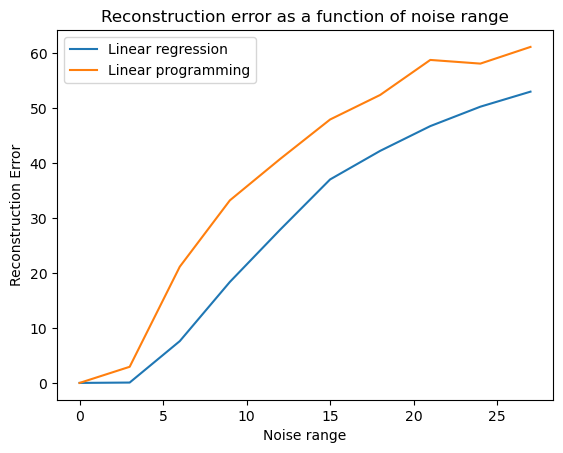

In [6]:
# Number of individuals
n = 150
# Number of subsets (queries)
m = 5*n
#Number of iterations
num_iterations = 30
#Probability that a data point is 1
p = 0.5

noise_range = range(0, 30, 3)
lin_reg_error_arr = np.zeros(len(noise_range))
lin_prog_error_arr = np.zeros(len(noise_range))
for i, noise_scale in enumerate(noise_range):
    lin_reg_error = 0
    lin_prog_error = 0
    for sim in range(num_iterations):
        data = np.random.binomial(1, p, n)
        Q = np.random.binomial(1, 0.5, (m, n))
        r = Q.dot(data) + np.random.choice(range(-noise_scale, noise_scale+1), m)
        rec_reg = rec_lin_reg(Q, r)
        lin_reg_error += np.sum(abs(rec_reg-data.T))
        rec_prog = rec_lin_prog(Q, r)
        lin_prog_error += np.sum(abs(rec_prog-data))
    lin_reg_error_arr[i] = lin_reg_error / num_iterations
    lin_prog_error_arr[i] = lin_prog_error / num_iterations

plt.plot(noise_range, lin_reg_error_arr, label='Linear regression')
plt.plot(noise_range, lin_prog_error_arr, label='Linear programming')
plt.xlabel('Noise range')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error as a function of noise range')
plt.legend()
plt.show()

# Basic anonymization techniques

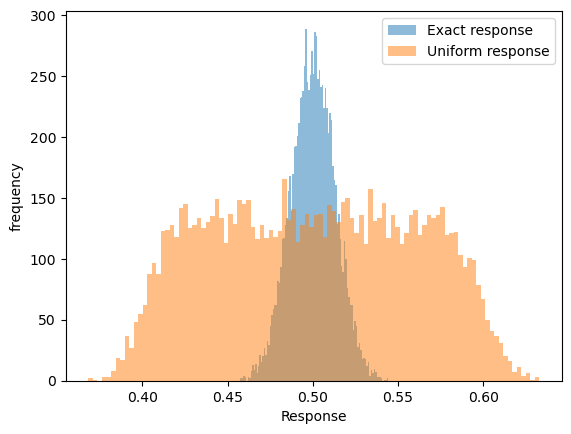

In [7]:
num_trials = 10000
num_samples = 500
uniform_range = 0.1
exact_response_arr = np.zeros(num_trials)
uniform_response_arr = np.zeros(num_trials)
for i in range(num_trials):
    data = np.random.uniform(0, 1, num_samples)
    exact_response_arr[i] = np.mean(data)
    uniform_response_arr[i] = np.random.uniform(-uniform_range, uniform_range) + exact_response_arr[i]

#plot histogram of exact response and rounded output
plt.hist(exact_response_arr, bins=100, alpha=0.5, label='Exact response')
plt.hist(uniform_response_arr, bins=100, alpha=0.5, label='Uniform response')
plt.legend(loc='upper right')
plt.xlabel('Response')
plt.ylabel('frequency')
plt.show()


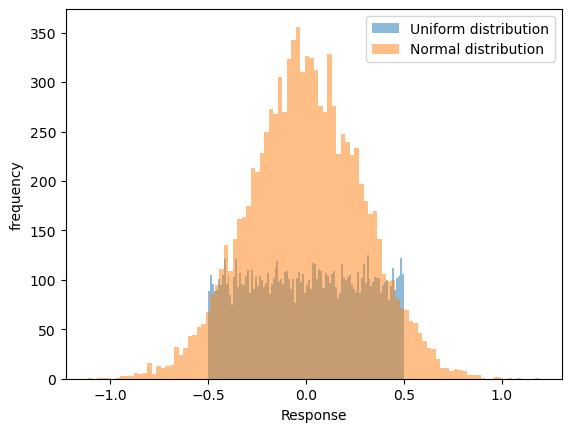

In [8]:
num_trials = 10000
uni_dist = np.random.uniform(-0.5, 0.5, num_trials)
normal_dist = np.random.normal(0, 1/np.sqrt(12), num_trials)

#plot the distribution on uni_dist
plt.hist(uni_dist, bins=100, alpha=0.5, label='Uniform distribution')
plt.hist(normal_dist, bins=100, alpha=0.5, label='Normal distribution')
plt.legend(loc='upper right')
plt.xlabel('Response')
plt.ylabel('frequency')
plt.show()
